Loading Necessary Modules

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Loading Dataset

In [6]:
url = 'https://raw.githubusercontent.com/MilanBinsMathew/Robot_Grasping_Robustness_Prediction/main/shadow_robot_dataset.csv'

dataset = pd.read_csv(url)
dataset.head()



,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,85.758903,0.118209,6.838743,1.454113,0.302276,-18.738705,-0.032352,0.127232,0.040447,-0.058297,-0.011933,-0.138550,0.053953,-7.091730,0.338437,21.305433,0.544194,0.109246,0.042166,0.041517,0.439459,-13.975613,0.177114,5.456443,1.493776
1,85.758903,0.152945,5.997176,1.098305,0.308893,-14.173090,-0.027381,0.273711,-0.007811,-0.059174,0.048517,-0.129178,0.010836,-10.479467,0.325636,34.575826,0.804912,0.105656,-0.130178,0.075700,0.446421,-17.618561,0.176817,5.130892,1.493497
2,85.758903,0.162168,5.302321,0.999142,0.314331,-13.093510,-0.025808,0.184343,-0.024433,-0.057710,0.099157,-0.143311,0.003063,-10.756263,0.315799,31.028958,0.867840,0.103620,-0.162815,0.095730,0.439690,-13.031110,0.174343,5.650662,1.523433
3,85.758903,0.137684,6.504519,1.256002,0.304333,-16.948796,-0.027398,0.121100,-0.009160,-0.056178,0.081461,-0.158807,0.026105,-9.433894,0.324489,27.353780,0.744199,0.106332,-0.186364,0.068382,0.445833,-11.763374,0.180723,5.267410,1.455800
4,85.758903,0.161747,4.899113,0.999313,0.315815,-13.700695,-0.025698,0.079876,-0.026569,-0.057618,0.153013,-0.143695,0.003519,-10.523774,0.322725,32.159343,0.809915,0.104104,-0.216307,0.090358,0.438578,-15.347191,0.164628,6.339569,1.627478


Seperating Target & Features

Splitting the dataset into Test and Training (1:4)

In [7]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Y'], axis = 1).values
Y = dataset['Y'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

Modelling

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.regularizers import l2

In [86]:
model = Sequential([
                    Dense(24, activation = 'relu', input_shape = (24,)),
                    BatchNormalization(),
                    Dense(128, activation ='relu'),
                    Dense(256, activation ='relu'),
                    Dense(512, activation ='relu'),
                    Dense(256, activation = 'relu'),
                    Dense(128, activation = 'relu'),
                    BatchNormalization(),
                    Dense(64),
                    Dense(1)

])

opt = Adam(learning_rate = 0.01)

model.compile(optimizer = opt, loss = 'mean_absolute_error')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 24)                600       
_________________________________________________________________
batch_normalization_32 (Batc (None, 24)                96        
_________________________________________________________________
dense_124 (Dense)            (None, 128)               3200      
_________________________________________________________________
dense_125 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_126 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_127 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_128 (Dense)            (None, 128)             

In [87]:
history = model.fit(x = X_train, y = Y_train, validation_data = (X_test, Y_test), epochs = 200, batch_size = 32)

Epoch 1/200
63/63 [==============================] - 2s 11ms/step - loss: 34.3311 - val_loss: 36.2774
Epoch 2/200
63/63 [==============================] - 1s 9ms/step - loss: 18.5156 - val_loss: 23.4043
Epoch 3/200
63/63 [==============================] - 1s 9ms/step - loss: 16.5386 - val_loss: 25.9403
Epoch 4/200
63/63 [==============================] - 1s 8ms/step - loss: 17.4223 - val_loss: 15.0544
Epoch 5/200
63/63 [==============================] - 1s 9ms/step - loss: 16.0110 - val_loss: 21.8367
Epoch 6/200
63/63 [==============================] - 1s 9ms/step - loss: 15.4060 - val_loss: 13.8608
Epoch 7/200
63/63 [==============================] - 1s 9ms/step - loss: 16.9622 - val_loss: 19.2511
Epoch 8/200
63/63 [==============================] - 1s 9ms/step - loss: 16.5529 - val_loss: 28.7913
Epoch 9/200
63/63 [==============================] - 1s 9ms/step - loss: 15.5955 - val_loss: 18.2770
Epoch 10/200
63/63 [==============================] - 1s 9ms/step - loss: 15.9029 - val_lo

Evaluating the Results

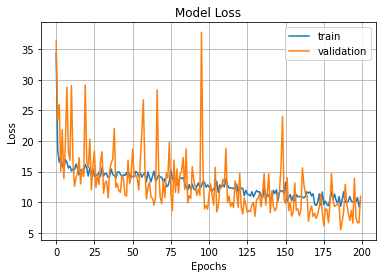

In [88]:
fig1 = plt.gcf()
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.axis()
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [89]:
a=sum(np.square(history.history['loss']))           # a -> sum of square of residuals
b=sum(np.square(Y_train - np.mean(Y_train)))   # b -> total sum of sqaures
r2_value_train = 1-(a/b)

print("Training R2 Value: ",r2_value_train)

a=sum(np.square(history.history['val_loss']))           # a -> sum of square of residuals
b=sum(np.square(Y_test - np.mean(Y_test)))   # b -> total sum of sqaures
r2_value_test = 1-(a/b)

print("Training R2 Value: ",r2_value_test)


Training R2 Value:  0.9926386715748051
Training R2 Value:  0.9660845948505702


Predicted with the model.

In [92]:

n = [[0.158289534,3.05267677,1.427061306,0.392156442,-12.13737689,0.001693284,0.020923727,-0.007429062,0.003801548,-0.144461287,-0.244766437,-0.002547664,-6.528908376,0.418608479,13.03182521,0.565060524,-0.028719413,0.099741034,0.046079096,0.347603182,-7.112931098,0.218037302,2.79698912,0.551546687]]
print(model.predict(n))



[[121.561104]]
